# Total counts plots

**Import packages**

In [1]:
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

spark = SparkSession.builder \
    .master('local[9]') \
    .config("spark.driver.memory", "19g") \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .getOrCreate()

import matplotlib.pyplot as plt

**Load the data**

In [2]:
# Read in the total counts of bigrams
totalcounts_2 = spark.read.option('header', False)\
                     .option('lineSep', '\t')\
                     .csv('/data/shared1/total_counts/totalcounts-2')

**Prepare the data for analysis**

In [3]:
# Bigrams
totalcounts_2 = totalcounts_2.withColumnRenamed('_c0', 'year')
totalcounts_2 = totalcounts_2.withColumnRenamed('_c1', 'bigram_count')
totalcounts_2 = totalcounts_2.withColumnRenamed('_c2', 'page_count')
totalcounts_2 = totalcounts_2.withColumnRenamed('_c3', 'volume_count')

In [4]:
# Bigrams
totalcounts_2 = totalcounts_2.withColumn("year", totalcounts_2["year"].cast('int'))
totalcounts_2 = totalcounts_2.withColumn('page_count', totalcounts_2['page_count'].cast('int'))
totalcounts_2 = totalcounts_2.withColumn('volume_count', totalcounts_2['volume_count'].cast('int'))
totalcounts_2 = totalcounts_2.withColumn('bigram_count', totalcounts_2['bigram_count'].cast('float'))

**Describe data**

In [26]:
# Bigrams
print("Schema of dataset:")
totalcounts_2.printSchema()

Schema of dataset:
root
 |-- year: integer (nullable = true)
 |-- bigram_count: float (nullable = true)
 |-- page_count: integer (nullable = true)
 |-- volume_count: integer (nullable = true)



In [27]:
totalcounts_2pd = totalcounts_2.toPandas()

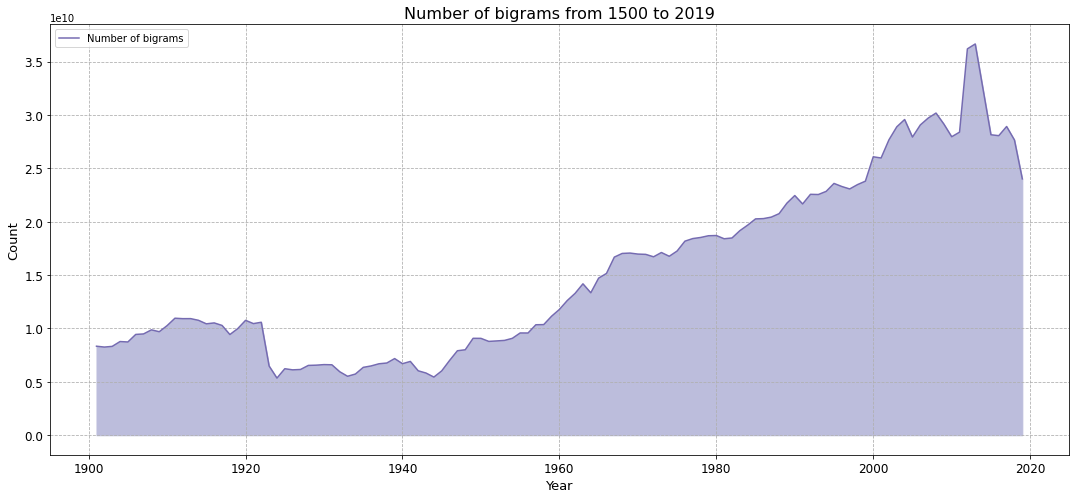

In [32]:
# The number of bigrams
totalcounts_2pd[totalcounts_2pd.year > 1900].plot(x='year', y='bigram_count', kind='line',figsize=(15,7), color = '#756bb1')
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Count",fontsize = 13)
plt.legend(['Number of bigrams'])
plt.title("Number of bigrams from 1500 to 2019", fontsize = 16)
plt.tight_layout()
plt.fill_between(totalcounts_2pd[totalcounts_2pd.year > 1900].year,totalcounts_2pd[totalcounts_2pd.year > 1900].bigram_count, color = '#bcbddc')
plt.grid(linestyle='--')
plt.tick_params(labelsize=12);
plt.savefig('NumBi1900.png')
plt.show()

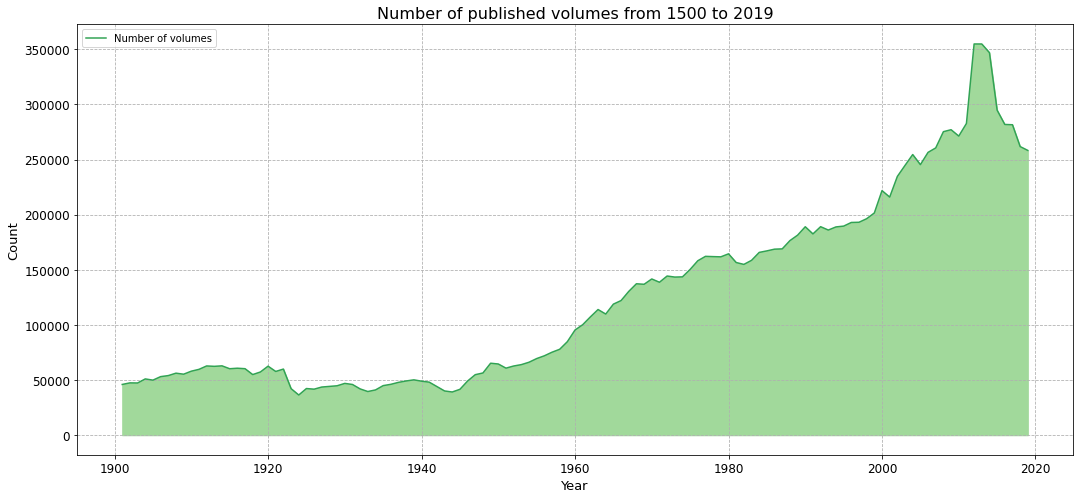

In [33]:
# Number of volumes per year
totalcounts_2pd[totalcounts_2pd.year > 1900].plot(x='year', y='volume_count', kind='line',figsize=(15,7),color = '#31a354')
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Count",fontsize = 13)
plt.legend(['Number of volumes'])
plt.title("Number of published volumes from 1500 to 2019", fontsize = 16)
plt.tight_layout()
plt.fill_between(totalcounts_2pd[totalcounts_2pd.year > 1900].year,totalcounts_2pd[totalcounts_2pd.year > 1900].volume_count, color = '#a1d99b')
plt.grid(linestyle='--')
plt.tick_params(labelsize=12);
plt.savefig('NumVol1900.png')
plt.show()